This notebook describes dot blot experiments to determine the amount of monomeric amyloid beta (AB) that remained at the end of the aggregation reaction. 

Fibrils were formed using 1 uM amyloid beta in the absence and presence of 0, 6, or 20 uM 10074-G5 at 37 degrees C. At the beginning (0 hours) and end (15 hours) of the aggregation reaction, samples were ultracentrifuged to remove aggregates and the supernatant was spotted on a nitrocellulose membrane, followed by exposure to primary and secondary antibodies. 

In [42]:
#import useful things
import numpy as np
import pandas as pd
import math
import matplotlib.pyplot as plt; plt.rcdefaults()
from scipy import stats
%matplotlib inline

In [63]:
#load in data
AB_0um_G5_0h = pd.read_csv('amyloid_beta_0uM_10074G5_Time0h.csv',  header=None).values.flatten()
AB_0um_G5_15h = pd.read_csv('amyloid_beta_0uM_10074G5_Time15h.csv',  header=None).values.flatten()

AB_6um_G5_0h = pd.read_csv('amyloid_beta_6uM_10074G5_Time0h.csv',  header=None).values.flatten()
AB_6um_G5_15h = pd.read_csv('amyloid_beta_6uM_10074G5_Time15h.csv',  header=None).values.flatten()

AB_20um_G5_0h = pd.read_csv('amyloid_beta_20uM_10074G5_Time0h.csv',  header=None).values.flatten()
AB_20um_G5_15h = pd.read_csv('amyloid_beta_20uM_10074G5_Time15h.csv',  header=None).values.flatten()

AB_control_concs = pd.read_csv('amyloid_beta_concs.csv',  header=None).values.flatten()
AB_control_vals = pd.read_csv('amyloid_beta_standard_curve.csv',  header=None).values.flatten()


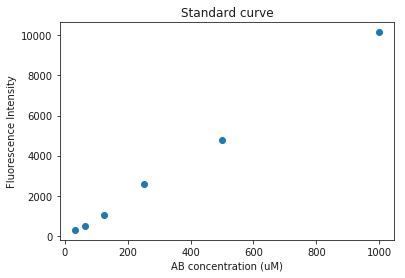

In [66]:
#Plot standard curve

plt.scatter(AB_control_concs, AB_control_vals)
plt.title("Standard curve")
plt.xlabel("AB concentration (uM)")
plt.ylabel("Fluorescence Intensity")

plt.show()

In [67]:
#perform a linear regression to get the slope, intercept, and coefficient of determination (R-squared) of the standard curve
slope, intercept, r_value, p_value, std_err = stats.linregress(AB_control_concs, AB_control_vals)
print("slope: %f    intercept: %f    R-squared: %f" % (slope, intercept, r_value**2))

slope: 10.223004    intercept: -131.158587    R-squared: 0.998881


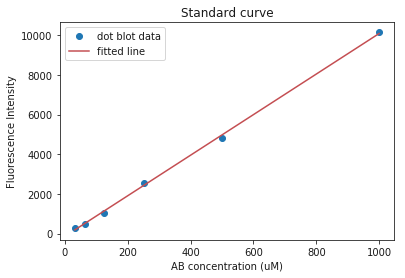

In [68]:
#plot data with fitted line
plt.plot(AB_control_concs, AB_control_vals, 'o', label='dot blot data')
plt.plot(AB_control_concs, intercept + slope*AB_control_concs, 'r', label='fitted line')
plt.legend()
plt.title("Standard curve")
plt.xlabel("AB concentration (nM)")
plt.ylabel("Fluorescence Intensity")
plt.show()


In [85]:
#convert intensities to concentrations
cAB_0um_G5_15h  = (AB_0um_G5_15h  - intercept)/slope
cAB_6um_G5_15h  = (AB_6um_G5_15h  - intercept)/slope
cAB_20um_G5_15h = (AB_20um_G5_15h - intercept)/slope

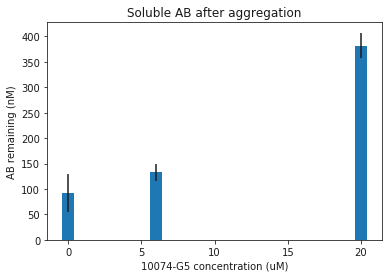

In [94]:
concs = [0, 6, 20]
final_vals = [cAB_0um_G5_15h.mean(), cAB_6um_G5_15h.mean(), cAB_20um_G5_15h.mean()]
final_errs = [cAB_0um_G5_15h.std(), cAB_6um_G5_15h.std(), cAB_20um_G5_15h.std()]
plt.bar(concs, final_vals, yerr=final_errs)

plt.title("Soluble AB after aggregation")
plt.xlabel("10074-G5 concentration (uM)")
plt.ylabel("AB remaining (nM)")

plt.show()